[0.05354889 0.09851195]
ROOT MEAN SQUARE VALUE FOR LAMBDA 2  is:  0.973513669044689


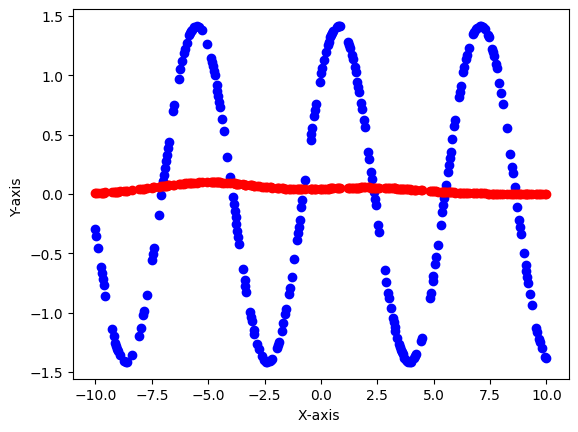

[-2.12686712  5.28997608 -2.88832212 -0.41819532 -0.92544144]
ROOT MEAN SQUARE VALUE FOR LAMBDA 5  is:  0.8363057550656938


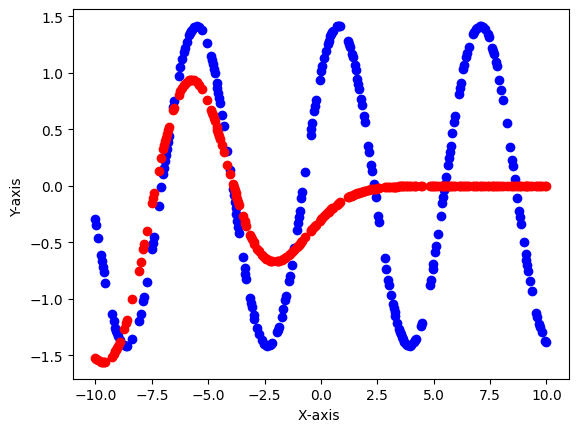

[ 6.32058476 -0.47743076 -1.690164    1.73986578  2.82439386  1.27848907
  0.10432138  3.09314561 -3.17100966  1.98623176 -3.00577068  3.77571759
 -2.99965069  2.12963414 -1.18409987 -4.60359511  1.73986578 -5.20671823
 -2.78482607 -2.06656326]
ROOT MEAN SQUARE VALUE FOR LAMBDA 20  is:  0.3197320011767606


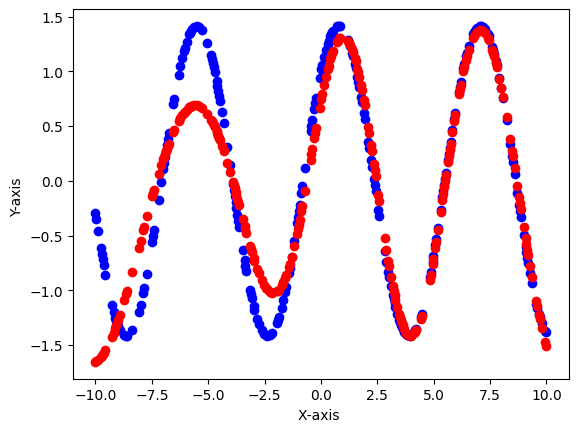

[-1.36903939  0.52202477 -1.25923846 -0.46286767 -0.04742152 -0.49993788
 -0.30617836 -0.91987648  0.82473578 -0.89787299 -0.93342523 -0.63933827
  0.60951948  0.93516591 -0.56814099  0.22325217  1.23015464  0.98585716
 -0.23249086 -0.9621476   0.85780446 -1.56169658  0.89891202 -0.8859328
  0.61050654 -0.74138919  1.8995424  -0.66954016 -0.73397334 -0.89787299
  1.83123058 -1.61749496 -0.35309174 -0.4104084   1.14522469  1.115395
 -0.49993788 -0.66954016  0.88385291  0.31486235  0.71471532  0.8856724
 -1.63398805  0.77936607 -0.56814099 -1.61749496  1.94140501 -1.47263712
  0.93298038  2.17766558]
ROOT MEAN SQUARE VALUE FOR LAMBDA 50  is:  0.08710088239916274


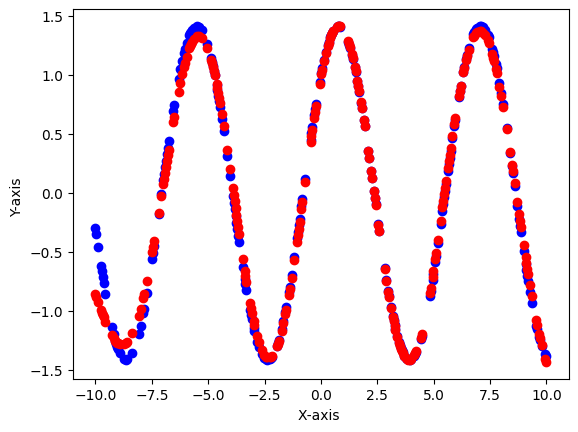

[-0.43217061 -0.02426937  0.47189026 -0.02154985  0.66253512  1.02530397
  1.0875583  -0.56803319  0.0222761  -0.36435435 -0.47009547 -0.54241394
 -0.51848565 -0.48786628  0.53383291 -0.21300002 -0.36163715 -0.59895266
  0.00402708 -0.1949721  -0.12378684 -0.09300445  0.22480316 -0.54865846
 -0.4380995   0.53787249  0.065463   -0.1794764  -0.74667411  0.37275045
  0.8805981  -0.02426937  0.02077339  0.257606    0.74481708  0.88964771
 -0.44794511 -0.47121938 -0.48310021  0.69050104 -0.28136485  0.85092477
 -0.22182665 -0.59895266 -0.5675594  -0.74794093  0.35265249 -0.50862681
  0.52734969  1.53027714  0.54589165 -0.11081833 -0.65965202  0.205356
 -0.61886044 -0.12378684 -0.26907794 -0.44794511 -0.50025393 -0.36163715
 -0.32541223 -0.74794093 -0.2794568   0.47189026 -0.37966114 -0.17327185
  0.66253512  0.06162247  0.47444465 -0.37567031  0.97507636  0.45934543
  0.29626595 -0.56803319  0.49610542  0.16242386  0.47444465 -0.4467087
 -0.31459631 -0.54865846 -0.59895266  0.6068862   1.16

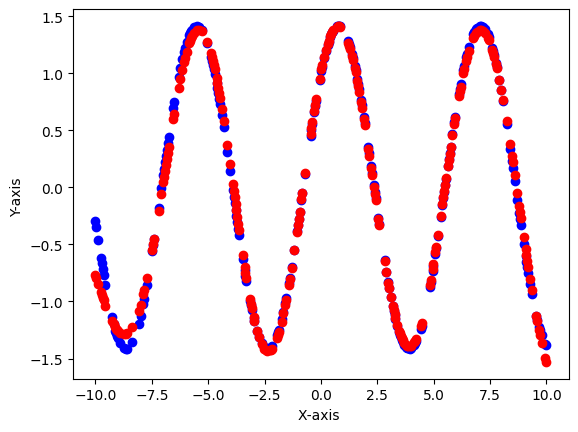

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

# ridgetest = "ridgetest.txt"
# ridgetrain = "ridgetrain.txt"

ridgetest = "ridgetest.txt"
ridgetrain = "ridgetrain.txt"
try:
    with open(ridgetrain, "r") as file:
        # Read the contents of the file
        ridgetrain_content = file.read()
        words = ridgetrain_content.split()
        # print(words)
        # print("entered!!!!")
        x = []
        y = []
        ridgetrain_x = []
        ridgetrain_y = []
        for j in range(0, len(words), 2):
            for i in range(2):
                if i ==0:
                    ridgetrain_x.append(float(words[j+i]))
                if i ==1:
                    ridgetrain_y.append(float(words[j+i]))
        # print(x)
        # print(y)
        # print("ridgetrain_y")
        # print(ridgetrain_y)
        list_of_list = []
        for i,j in zip(ridgetrain_x,ridgetrain_y):
            # print(i,j)
            temp = []
            i_int = float(i)
            j_int = float(j)
            temp.append(i_int)
            temp.append(j_int)
            list_of_list.append(temp)
        # print(list_of_list)
        # print(y)




except FileNotFoundError:
    print(f"The file {file_path} does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")



# x_n = list_of_list[0][0]
# x_m = list_of_list[1][0]
def rbf_kernel(x_n,x_m):
    gamma = 0.1
    rbf = math.exp(-1*gamma*(np.linalg.norm(float(x_n)-float(x_m))**2))
    return rbf
# print(np.linalg.norm(x_n-x_m)**2)


Ls = [2, 5, 20, 50, 100]


for L in Ls:
    lamda=0.1
    landmarks=[]
    for i in range(L):
        random_number = random.randint(0, len(ridgetrain_y)-1)
        landmarks.append(random_number)
    transformed_data = []
    for i in range(len(ridgetrain_x)):
        temp=[]
        for j in range(L):
            temp.append(rbf_kernel(ridgetrain_x[landmarks[j]],ridgetrain_x[i]))
        transformed_data.append(temp)
    Identity_matrix=np.identity(L)
    W=np.dot(np.transpose(transformed_data),transformed_data)
    W=W+lamda*Identity_matrix
    W=np.linalg.inv(W)
    XTY=np.dot(np.transpose(transformed_data),ridgetrain_y)
    W=np.dot(W,XTY)
    try:
        with open(ridgetest, "r") as file:
            # Read the contents of the file
            ridgetrain_content = file.read()
            words = ridgetrain_content.split()

            ridgetest_x = []
            ridgetest_y = []
            for j in range(0, len(words), 2):
                for i in range(2):
                    if i ==0:
                        ridgetest_x.append(float(words[j+i]))
                    if i ==1:
                        ridgetest_y.append(float(words[j+i]))
            # print(x)
            # print(y)
            # print("ridgetest_x")
            # print(ridgetrain_y)
            list_of_list_test = []
            for i,j in zip(ridgetest_x,ridgetest_y):
                # print(i,j)
                temp = []
                i_int = float(i)
                j_int = float(j)
                temp.append(i_int)
                temp.append(j_int)
                list_of_list_test.append(temp)
            transformed_test_data = []
            for i in range(len(list_of_list_test)):
                temp=[]
                for j in range(L):
                    temp.append(rbf_kernel(ridgetrain_x[landmarks[j]],ridgetest_x[i]))
                transformed_test_data.append(temp)

        # print(ridgetest_x)
        # print(ridgetest_y)

    except FileNotFoundError:
        print(f"The file {ridgetest} does not exist.")
    except Exception as e:
        print(f"An error occurred: {e}")







    pred=[]
    print(W)
    for i in range(len(list_of_list_test)):
        pred.append(np.dot(W,np.transpose(transformed_test_data[i])))
    # print(pred)
    # print("pred!")
    # print(ridgetest_x)
    # print(ridgetest_y)
    # print(len(pred))
    # print(len(ridgetest_y))
    # print(pred)

    # RMS
    sum =0
    for i in range(0,len(pred)):
        sum += (list_of_list_test[i][1]-pred[i])**2
    MSE = sum/len(pred)
    RSME = math.sqrt(MSE)

    print("ROOT MEAN SQUARE VALUE FOR LAMBDA", L," is: ", RSME)


    plt.scatter(ridgetest_x,ridgetest_y, marker='o', c='blue')
    plt.scatter(ridgetest_x,pred, marker='o', c='red')
    # Customize the plot
    # plt.title('For lamda ='+str(index))
    plt.xlabel('X-axis ')
    plt.ylabel('Y-axis ')
    # Show the plot
    plt.show()





